In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import glob
import cv2
import io



In [17]:
main_data = pd.read_csv('data_labels_mainData.csv')
extra_data = pd.read_csv('data_labels_extraData.csv')
# Specify the folder path where the images are located
folder_path = './data/patch_images/'

# Use glob to get a list of image file paths
image_paths = glob.glob(folder_path + '/*.png')  # Change the extension as per your image file types
df_paths = pd.DataFrame({'Image_Path': image_paths})

In [18]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [20]:
#def preprocess_image(image_name):
    #image_path = os.path.join('data','patch_images', image_name)  # Update the path to the images directory
    #image = Image.open(image_path)
    #image = image.resize((27, 27))
    #image = np.array(image)
    #image = image / 255.0
    #return image
# Load the dataset
#main_data = pd.read_csv('data_labels_mainData.csv')
#extra_data = pd.read_csv('data_labels_extraData.csv')


# Preprocess the data
#main_data["isCancerous"] = np.where(main_data["isCancerous"] == 0, 0, 1)
#main_images = np.array([preprocess_image(image_name) for image_name in main_data["ImageName"]])
# Load the additional dataset

# Preprocess the additional data
#extra_data["isCancerous"] = np.where(extra_data["isCancerous"] == 0, 0, 1)

#extra_images = np.array([preprocess_image(image_name) for image_name in extra_data["ImageName"]])
#extra_labels = np.array(extra_data["isCancerous"])

In [88]:
df_paths['ImageName'] = df_paths['Image_Path'].apply(lambda x: os.path.basename(x))
data_merged_main = pd.merge(main_data,df_paths, on='ImageName',how='inner')

In [89]:
data_merged_main 

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,Image_Path
0,22405,1,22405.png,fibroblast,0,0,./data/patch_images\22405.png
1,22406,1,22406.png,fibroblast,0,0,./data/patch_images\22406.png
2,22407,1,22407.png,fibroblast,0,0,./data/patch_images\22407.png
3,22408,1,22408.png,fibroblast,0,0,./data/patch_images\22408.png
4,22409,1,22409.png,fibroblast,0,0,./data/patch_images\22409.png
...,...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1,./data/patch_images\1625.png
9892,1626,60,1626.png,epithelial,2,1,./data/patch_images\1626.png
9893,1627,60,1627.png,epithelial,2,1,./data/patch_images\1627.png
9894,1628,60,1628.png,epithelial,2,1,./data/patch_images\1628.png


In [90]:
train_data, test_data = train_test_split(data_merged_main, test_size=0.2, random_state=0)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=0)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 5937, Val Data: 1979, Test Data: 1980


In [106]:
train_data

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,Image_Path
9607,22344,58,22344.png,inflammatory,1,0,./data/patch_images\22344.png
3482,1168,19,1168.png,epithelial,2,1,./data/patch_images\1168.png
3189,8457,18,8457.png,epithelial,2,1,./data/patch_images\8457.png
131,18897,3,18897.png,inflammatory,1,0,./data/patch_images\18897.png
7048,18089,44,18089.png,fibroblast,0,0,./data/patch_images\18089.png
...,...,...,...,...,...,...,...
7170,18968,45,18968.png,fibroblast,0,0,./data/patch_images\18968.png
8317,3770,52,3770.png,fibroblast,0,0,./data/patch_images\3770.png
8777,13859,54,13859.png,others,3,0,./data/patch_images\13859.png
8321,3774,52,3774.png,fibroblast,0,0,./data/patch_images\3774.png


In [91]:
int(len(train_data)) + int(len(test_data)) + int(len(val_data))

9896

In [92]:
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dense, Flatten, Dropout


In [93]:
model = Sequential()

In [94]:
main_data.shape

(9896, 6)

In [48]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 2

In [127]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

In [128]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_27 (Flatten)        (None, 2187)              0         
                                                                 
 dense_54 (Dense)            (None, 256)               560128    
                                                                 
 dense_55 (Dense)            (None, 2)                 514       
                                                                 
Total params: 560,642
Trainable params: 560,642
Non-trainable params: 0
_________________________________________________________________


In [129]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')


In [130]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [131]:
train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

In [149]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="Image_Path",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="Image_Path",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 2 classes.
Found 1979 validated image filenames belonging to 2 classes.


In [133]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

C:\Users\Wobby\AppData\Local\Temp\ipykernel_12960\2779164914.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)


In [36]:
import matplotlib.pyplot as plt
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

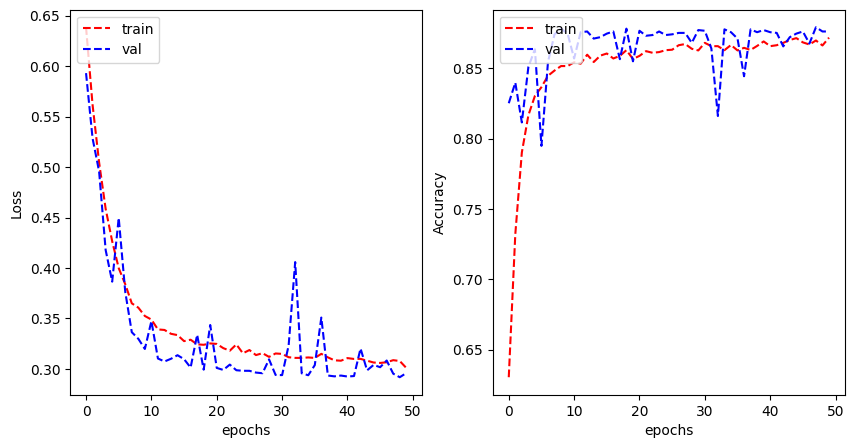

In [37]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [38]:
test_data['isCancerous'] = test_data['isCancerous'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./',
        x_col="Image_Path",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 1980 validated image filenames belonging to 2 classes.


In [99]:
model = tf.keras.Sequential([
    #First Layer
    tf.keras.layers.Conv2D(16, (3,3),1 ,activation = 'relu', input_shape=(INPUT_DIM)),
    #Second Layer   
    tf.keras.layers.Conv2D(32, (3,3),1 ,activation = 'relu'),
    #Third Layer
    tf.keras.layers.Conv2D(64, (3,3),1 ,activation = 'relu'),
    #Fourth Layer
    tf.keras.layers.Conv2D(128, (3,3),1 ,activation = 'relu'),
    #fifth Layer
    #tf.keras.layers.Conv2D(256, (3,3),1 ,activation = 'relu'),
   
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu')
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
    ])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 25, 25, 16)        448       
                                                                 
 conv2d_38 (Conv2D)          (None, 23, 23, 32)        4640      
                                                                 
 conv2d_39 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 conv2d_40 (Conv2D)          (None, 19, 19, 128)       73856     
                                                                 
 flatten_14 (Flatten)        (None, 46208)             0         
                                                                 
 dense_28 (Dense)            (None, 256)               11829504  
                                                                 
 dense_29 (Dense)            (None, 2)               

C:\Users\Wobby\AppData\Local\Temp\ipykernel_12960\2171485193.py:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)


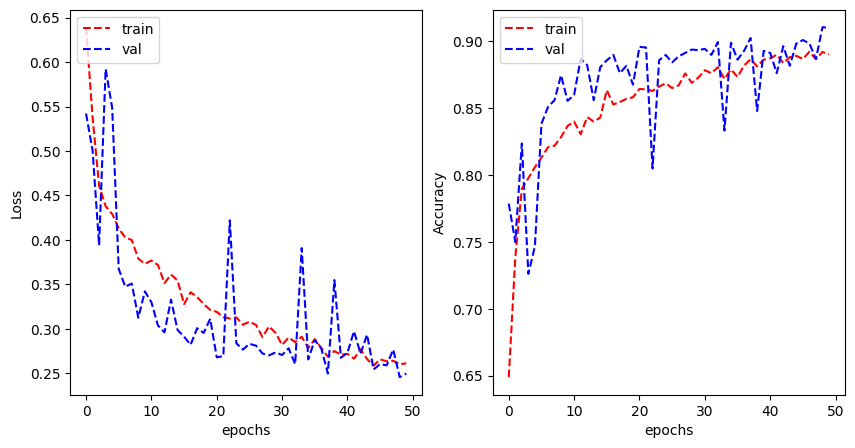

In [107]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 2
model = tf.keras.Sequential([
    #First Layer
    tf.keras.layers.Conv2D(16, (3,3),1 ,activation = 'relu', input_shape=(INPUT_DIM)),
    #Second Layer   
    tf.keras.layers.Conv2D(32, (3,3),1 ,activation = 'relu'),
    #Third Layer
    tf.keras.layers.Conv2D(64, (3,3),1 ,activation = 'relu'),
    #Fourth Layer
    tf.keras.layers.Conv2D(128, (3,3),1 ,activation = 'relu'),
    #fifth Layer
    #tf.keras.layers.Conv2D(256, (3,3),1 ,activation = 'relu'),
   
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='relu')
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
    ])
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')



In [39]:
model.evaluate(test_generator)

1980/1980 [==============================] - 9s 5ms/step - loss: 0.3155 - categorical_accuracy: 0.8677


[0.31546130776405334, 0.8676767945289612]

In [105]:
model.evaluate(test_generator)

1980/1980 [==============================] - 4s 2ms/step - loss: 0.2744 - categorical_accuracy: 0.8914


[0.2743602693080902, 0.8914141654968262]

In [76]:
label_names = {'cancerous' : 0, 'notCancerous' : 1}

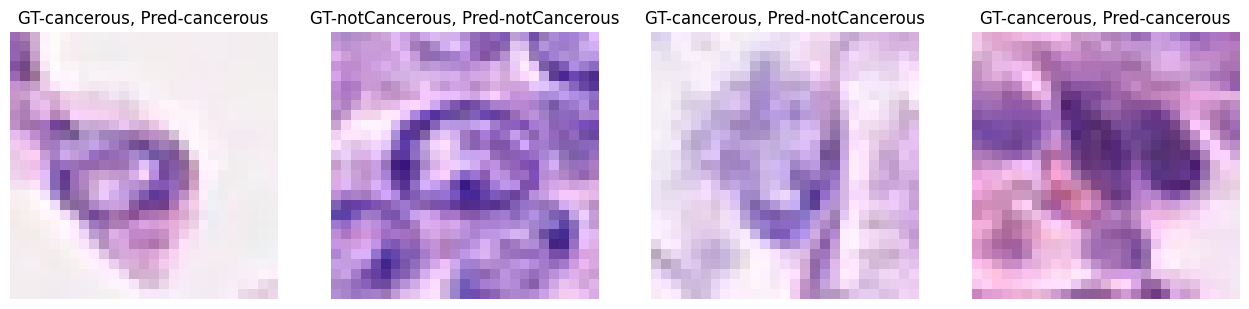

In [77]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(20,7))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

### VGGNET

In [150]:
model_VGG_1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(108, activation='relu', kernel_regularizer=tf.keras.regularizers.l2()),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [151]:
model_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])



In [152]:
history_VGG_1 = model_VGG_1.fit_generator(train_generator, validation_data = validation_generator, epochs=25, verbose=0)

C:\Users\Wobby\AppData\Local\Temp\ipykernel_12960\1457444843.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_VGG_1 = model_VGG_1.fit_generator(train_generator, validation_data = validation_generator, epochs=25, verbose=0)


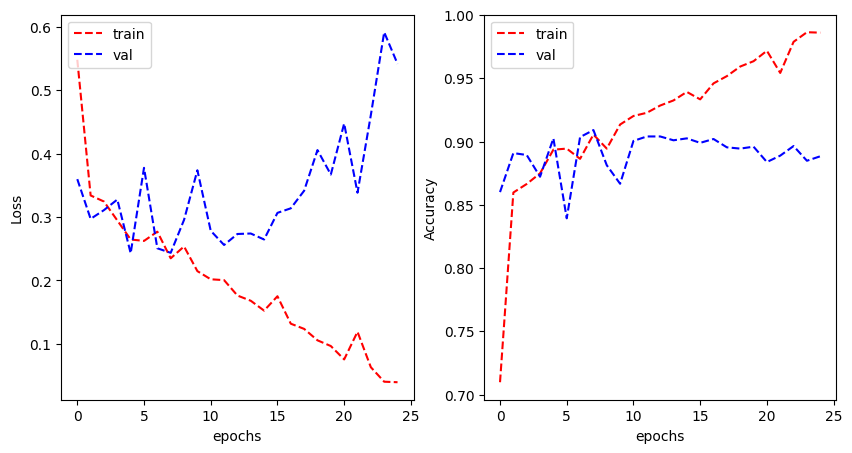

In [153]:
plot_learning_curve(history_VGG_1.history['loss'], history_VGG_1.history['val_loss'], 
                    history_VGG_1.history['categorical_accuracy'], history_VGG_1.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [154]:
train_data['isCancerous'] = train_data['isCancerous'].astype('str')
val_data['isCancerous'] = val_data['isCancerous'].astype('str')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                   rotation_range=15, width_shift_range=0.2,
                                   height_shift_range=0.2, brightness_range=[0.5,1.5])
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="Image_Path",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="Image_Path",
        y_col="isCancerous",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 2 classes.
Found 1979 validated image filenames belonging to 2 classes.


In [157]:
reg_lambda = 0.001
model_VGG_1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same', input_shape=(27, 27, 3)),
    tf.keras.layers.Conv2D(27, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 2
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(54, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    #VGG block 3
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(108, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(108, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES,kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

In [159]:
model_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])



In [160]:
history_VGG_1 = model_VGG_1.fit_generator(train_generator, validation_data = validation_generator, epochs=25, verbose=0)

C:\Users\Wobby\AppData\Local\Temp\ipykernel_12960\1457444843.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_VGG_1 = model_VGG_1.fit_generator(train_generator, validation_data = validation_generator, epochs=25, verbose=0)


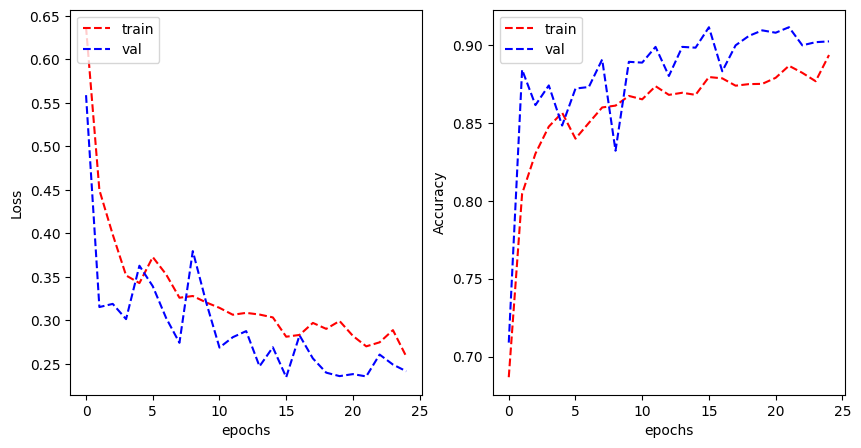

In [161]:
plot_learning_curve(history_VGG_1.history['loss'], history_VGG_1.history['val_loss'], 
                    history_VGG_1.history['categorical_accuracy'], history_VGG_1.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(20,7))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

In [162]:
model_VGG_1.evaluate(test_generator)

1980/1980 [==============================] - 6s 3ms/step - loss: 0.2593 - categorical_accuracy: 0.8949


[0.2593062222003937, 0.8949494957923889]

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(20,7))
batches = 0
for x,y in test_generator:
        batches = batches + 1
        y_hat = model_VGG_1.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))
            
        else:
            break
        
        plt.axis('off')

In [112]:
train_data['cellType'] = train_data['cellType'].astype('str')
val_data['cellType'] = val_data['cellType'].astype('str')

In [143]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

_train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
_val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./',
        x_col="Image_Path",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./',
        x_col="Image_Path",
        y_col="cellType",
        target_size=(27, 27),
        batch_size=batch_size,
        class_mode='categorical')

Found 5937 validated image filenames belonging to 4 classes.
Found 1979 validated image filenames belonging to 4 classes.
